<a href="https://colab.research.google.com/github/liams-code/liams-coding/blob/main/solAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UPBIT-API SOL 10분동안 prophet으로 DEEP learning 시켜서 4시간 후 예측하는 코딩

In [ ]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 6.1 MB/s 


In [ ]:
import pyupbit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#BTC 최근 200분의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-SOL", interval="minute10")
df

,open,high,low,close,volume,value
2022-03-01 05:10:00,116900.0,117500.0,116650.0,117500.0,3542.826836,4.148958e+08
2022-03-01 05:20:00,117450.0,119700.0,117450.0,119100.0,18766.733055,2.228884e+09
2022-03-01 05:30:00,119100.0,119300.0,118600.0,118850.0,6775.864625,8.059670e+08
2022-03-01 05:40:00,118850.0,119550.0,118750.0,119500.0,5951.843970,7.094948e+08
2022-03-01 05:50:00,119550.0,121150.0,119050.0,121000.0,20583.360031,2.471479e+09
...,...,...,...,...,...,...
2022-03-02 13:40:00,126300.0,126700.0,125900.0,125950.0,10893.756960,1.376747e+09
2022-03-02 13:50:00,125950.0,126250.0,125400.0,125900.0,11320.276887,1.425024e+09
2022-03-02 14:00:00,125900.0,126100.0,124850.0,125050.0,13425.291306,1.684475e+09
2022-03-02 14:10:00,124900.0,125300.0,124600.0,125300.0,9862.742060,1.231980e+09


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-03-01 05:10:00,117500.0
1,2022-03-01 05:20:00,119100.0
2,2022-03-01 05:30:00,118850.0
3,2022-03-01 05:40:00,119500.0
4,2022-03-01 05:50:00,121000.0
...,...,...
195,2022-03-02 13:40:00,125950.0
196,2022-03-02 13:50:00,125900.0
197,2022-03-02 14:00:00,125050.0
198,2022-03-02 14:10:00,125300.0


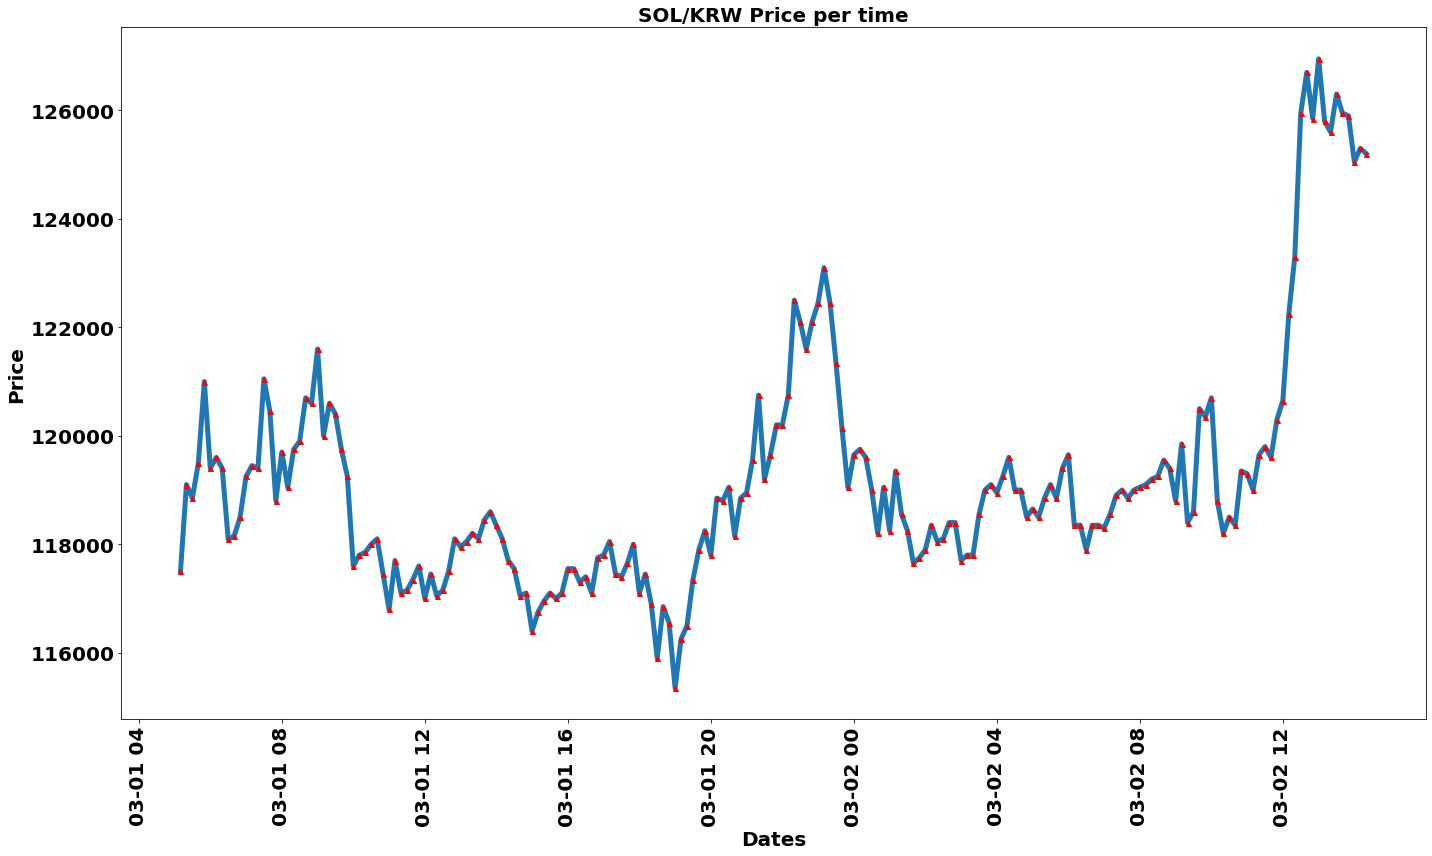

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(df.ds, df.y, linewidth=5)
plt.plot(df.ds, df.y, '^', markersize=5, color='red')
plt.xticks(fontsize=20, fontweight='bold',rotation=90)
plt.yticks(fontsize=20, fontweight='bold')
plt.xlabel('Dates',fontsize=20, fontweight='bold')
plt.ylabel('Price',fontsize=20, fontweight='bold')
plt.title('SOL/KRW Price per time',fontsize=20, fontweight='bold')
plt.tight_layout()

# 새 섹션

In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#6시간 미래 예측
future = model.make_future_dataframe(periods=4, freq='H')
forecast = model.predict(future)

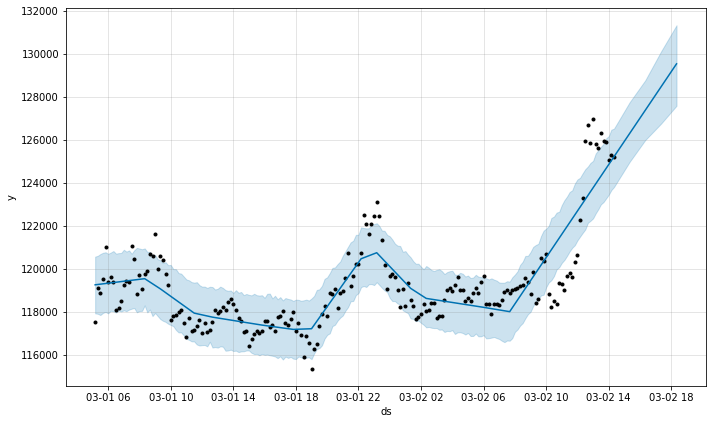

In [ ]:
#그래프1
fig1 = model.plot(forecast)